# Exercise 8 - Model interpretation

This exercise focuses on model interpretation. In this context model interpretation means the contributions of individual features to the prediction outcome. 

#### Contact

As always if you have any questions regarding the notebook or the course, please contact:

David Steyrl: david.steyrl@univie.ac.at 

And please ask questions in the forum so we can answer them directly or pick them up in a Q&A :)

Some helpful resources (accessed 21.11.2022):

- https://machinelearningmastery.com/calculate-feature-importance-with-python/

- https://realpython.com/linear-regression-in-python/

- https://pythonprogramming.net/regression-introduction-machine-learning-tutorial/

- https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

- https://christophm.github.io/interpretable-ml-book/

In [47]:
# Import packages that we will need in the exercise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold, train_test_split

## Preparing the data

We use the wine quality data set in this exercise. As usual, we try to predict the wine quality from a battery of wine metrics, e.g. residual sugar, citric acid, etc. This time, however, the final goal is to understand which of the features are important to the prediction outcome.

In [48]:
# Import wine quality data from .csv file
df_wine = pd.read_csv('winequality-white.csv', sep=";", header=0)
df_wine.head() # for more information such as mean and std per feature use .describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [49]:
# Check for missing values 
df_wine.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [50]:
# Preparing data assigning features and target
X = df_wine.drop(columns='quality')
y = df_wine.quality
y = y.values.reshape(-1, 1)

Since we workd through this already we keep the prediction part simple using a train-test split.
However, make sure you understand the code and consult the previous exercises or post to the forum if something is not clear! :)

In [51]:
# 1. Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
# Instantiate Regressor 
lin_regr = LinearRegression()
# 2. Fitting the Regression
lin_regr.fit(X_train, y_train)
# 3. Test regressor with test data (and training data to compare them)
y_pred_test = lin_regr.predict(X_test)
y_pred_train = lin_regr.predict(X_train)
# 4. Calc metric (e.g. r2)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
# We now have our predictions and the overall performance of our model
print('Predictions: ', y_pred_test)

print('Train performance: ', r2_train)

print('Test performance: ', r2_test)

Predictions:  [[5.5912529 ]
 [5.4637415 ]
 [6.09168743]
 ...
 [6.44740715]
 [5.8809231 ]
 [4.89256558]]
Train performance:  0.29167618400020756
Test performance:  0.24380039034361123


As expected the performance on the test set is lower than the performance on the training set.

# Model Inspection

## Linear Regression

Remember: Linear Regression fits a linear model with coefficients w = (w1, …, wp) (w ist das gleiche wie b) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

We can access the coeffiecients using .coef_ on our Linear Regression object. 

In [52]:
# What are our coefficients?
coef = lin_regr.coef_
print(coef)

[[ 1.15953365e-01 -1.81594265e+00 -1.66810488e-02  9.65149311e-02
  -5.13583573e-01  4.74413246e-03 -2.17957734e-04 -1.98333673e+02
   8.79948572e-01  6.27189921e-01  1.31644131e-01]]


In [53]:
# The coefficients are returned as a numpy array. We will convert the array to a list to plot our coefficients. 
print(type(coef))
coef = coef.tolist()[0] # we can do so using .tolist()
# we use [0] to get the first element of our list, to make sure we have a single list instead of lists of lists
# feel free to play around with the [0] if you are curious about it
print(type(coef))
print(coef)

<class 'numpy.ndarray'>
<class 'list'>
[0.11595336528372445, -1.8159426509738865, -0.016681048845243927, 0.0965149311323295, -0.5135835725745426, 0.0047441324576726895, -0.0002179577341210326, -198.33367328276236, 0.8799485721205478, 0.6271899211708349, 0.1316441313307533]


In [54]:
# Get labels for the features as a list. 
# Returns list of features except the target (quality) --> [:-1]
labels = df_wine.columns.values[:-1].tolist()
print(labels)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


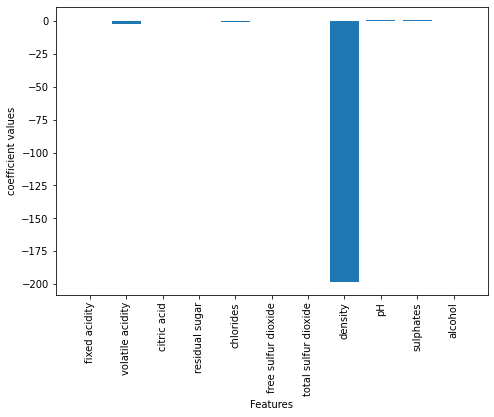

In [55]:
# Plot coefficients for each feature
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(labels, coef)
plt.xlabel('Features')
plt.ylabel('coefficient values')
plt.show()

Let's have a look at our coefficients. Which one is the most important one?
Well, at this point we cannot really tell. The problem is the different scales of our features. Let's have another look at the values of our data.

In [56]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


Linear machine learning algorithms fit a model where the prediction is the weighted sum of the input values .

These algorithms find a set of coefficients to use in the weighted sum in order to make a prediction. These coefficients can be used directly as a feature importance score. However, there is a problem. The weights depend on the scale of the imput variable. The weights are small if the values of a variable are big and vice versa. One way to cope with this problem is standardization.

Short recap on standardization: 

Standardization is the process of putting different variables on the same scale. This process allows you to compare scores between different types of variables. Typically, to standardize variables, you calculate the mean and standard deviation for a variable. Then, for each observed value of the variable, you subtract the mean and divide by the standard deviation.

In Scikit learn we can use the StandardScaler to apply standardization. 

In [57]:
# Import standardizer package
from sklearn.preprocessing import StandardScaler
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
#############################################################################
# Here is the StandardScaler application
# Standardize data using StandardScaler - 
# Create and fit StandardScaler
scaler_features = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_train)
scaler_targets = StandardScaler(copy=True, with_mean=True, with_std=True).fit(y_train)
# sidenote: it is important that we use the same scaling on both, training and test data.
# use the scaler derived form the training set (as in reality you would have no access to test data yet)
# Transform the data
X_train = scaler_features.transform(X_train)
y_train = scaler_targets.transform(y_train)
X_test = scaler_features.transform(X_test)
y_test = scaler_targets.transform(y_test)
#############################################################################
# From here on we perform the usual steps 
# Instantiate Regressor 
lin_regr = LinearRegression()
# Fitting the Regression
lin_regr.fit(X_train, y_train)
# Test regressor with test data (and training data to compare them)
y_pred_test = lin_regr.predict(X_test)
y_pred_train = lin_regr.predict(X_train)
# Calc metric (e.g. r2)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
# Get coefficients 
coef = lin_regr.coef_.tolist()[0]

In [58]:
# Our model performs equally well
print(r2_train)
print(r2_test)

0.2916761840002078
0.24380039034361078


In [59]:
# Let's look at our coefficients
print(coef)

[0.10941402566308804, -0.20852613199671266, -0.002272446841460579, 0.5511611672163299, -0.012982560086368718, 0.09175746502552068, -0.010510238971854796, -0.665131964699, 0.15155387595842723, 0.08332294354747703, 0.18513486257580447]


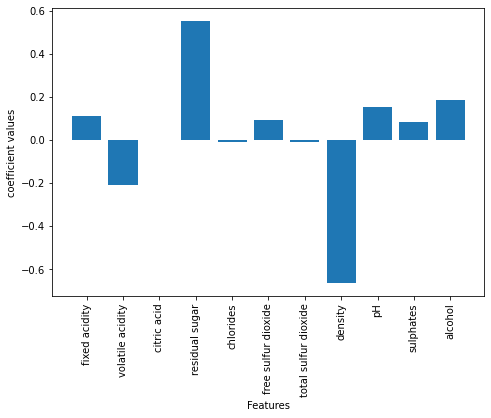

In [60]:
# Create the same plot as before
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(labels,coef)
plt.xlabel('Features')
plt.ylabel('coefficient values')
plt.show()

Now that the features are on the same scale we can compare the coefficients. 

However, since we standardized them, the usual interpretation of the weights is no longer true. Usually, the coefficients indicate the increase/decrease along the y-axis with each unit of increase along the x-axis. 
To be able to interpret the coefficients that way again we have to inverse the applied transform.


In [61]:
# inverse transform the coefficients
coef_retransformed = scaler_features.inverse_transform(lin_regr.coef_)
# we are using the coef np.array instead of the coef list as the method expects that type
print(coef_retransformed)

[[6.94963192e+00 2.57598095e-01 3.32737615e-01 9.09231218e+00
  4.55800378e-02 3.68579049e+01 1.38085478e+02 9.92044231e-01
  3.21094012e+00 5.00013435e-01 1.07487563e+01]]


To sum up: We have to standardize our features before we put them into our linear regression model to allow us to compare their importance to one another. 
In order to interpret their effect on our target variable in the usual way we inverse the applied transform to get the weight back in the scale of the original data. 

## Decision Trees 

When we inspect a linear regression model we take a closer look at the coefficients to gain an understanding about our features and their importance. 
In tree based methods there are no coefficients as in linear regression. However, we can inspect the importance of our features as measured by their contribution to the error reduction.
The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature, e.g. how much is the MSE reduced by a specific feature.

In [62]:
# Note: We would not have to redo the standarization since the data is still standardized.
# However, we left it in so you can switch between standardized/non-standardized.
# Go ahead and try it both ways and observe what happens!
# Preparing data assigning features and target - prepared for reloading data / exploring standardization
X = df_wine.drop(columns='quality')
y = df_wine.quality.values.reshape(-1, 1)
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
# Create and fit StandardScaler
scaler_features = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_train)
# Transform the data
X_train = scaler_features.transform(X_train)
X_test = scaler_features.transform(X_test)
# Instantiate Regressor, using max_depth=6, since we already found out in exercise 6 that it is the best setting
dec_tree = DecisionTreeRegressor(max_depth=6)
# Fitting the Decision tree
dec_tree.fit(X_train, y_train)
# Test DT with test data (and training data to compare them)
y_pred_test = dec_tree.predict(X_test)
y_pred_train = dec_tree.predict(X_train)
# Calc metric (e.g. r2)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

In [63]:
print(r2_train)
print(r2_test)

0.4394674875267762
0.25799534956150516


In [64]:
'''
The importance of features is automatically computed during the training of the DT and 
stored in the feature_importance_ variable
'''
print(dec_tree.feature_importances_)

[0.01781471 0.20988639 0.02055888 0.04418819 0.02160789 0.11023457
 0.00590945 0.01236929 0.03672134 0.03674412 0.48396516]


In [65]:
# Convert the features importance to list
feat_imp = dec_tree.feature_importances_.tolist()
print(feat_imp)

[0.017814714835834695, 0.2098863881085006, 0.020558878067669987, 0.04418818981843524, 0.021607892324008834, 0.11023457163883003, 0.005909453759625316, 0.012369293845166624, 0.036721339648127974, 0.036744117234031315, 0.48396516071976936]


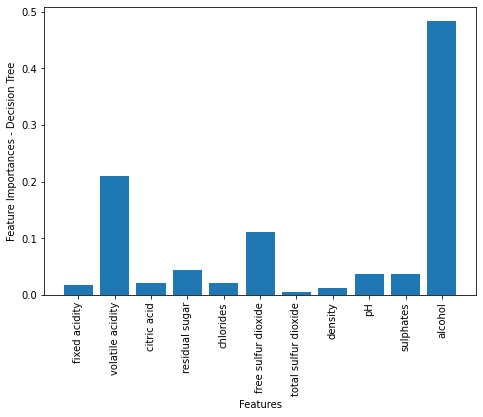

In [66]:
# Create the same plot as for the feature importance in the linear model
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.xticks(rotation=90)
ax.bar(labels,feat_imp)
plt.xlabel('Features')
plt.ylabel('Feature Importances - Decision Tree')
plt.show()

Here we see the contributions of each feature to the overall MSE reduction of the decision tree. The results are not the same as for the linear regression. Features have other importance. This is reasonable, since the performance of the two methods is not the same as well.

One more note is standardization in tree based methods:
Tree-based algorithms are fairly insensitive to the scale of the features. Think about it, a decision tree is only splitting a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node/reduces the error. This split on a feature is not influenced by other features.

Explore this behaviour in the example above by commenting/uncommenting the lines of code that implements the scaling! :)

Let's continue with the the random forest which will look similar. 

## Random Forest

In [67]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
# Create and fit StandardScaler
scaler_features = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_train)
scaler_targets = StandardScaler(copy=True, with_mean=True, with_std=True).fit(y_train)
# Transform the data
X_train = scaler_features.transform(X_train)
y_train = np.ravel(scaler_targets.transform(y_train))
X_test = scaler_features.transform(X_test)
y_test = np.ravel(scaler_targets.transform(y_test))
# Instantiate Regressor, restricting n_estimators only to reduce computation time
rf_regr = RandomForestRegressor(n_estimators=50)
# Fitting the RF
rf_regr.fit(X_train, y_train)
# Test RF with test data (and training data to compare them)
y_pred_test = rf_regr.predict(X_test)
y_pred_train = rf_regr.predict(X_train)
# Calc metric (e.g. r2)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

In [68]:
print(r2_train)
print(r2_test)

0.9293546933404772
0.4392916676619292


In [69]:
"""
The importance of features is automatically computed during the training of the DT and 
stored in the feature_importance_ variable
""" 
rf_feat_imp = rf_regr.feature_importances_.tolist()
print(rf_feat_imp)

[0.05854944414106475, 0.12454877207657596, 0.057136327345684655, 0.06863729056338155, 0.06425987940791772, 0.11228242642543812, 0.06574306254980265, 0.059012041241461095, 0.07166208442557026, 0.06277235760642907, 0.255396314216674]


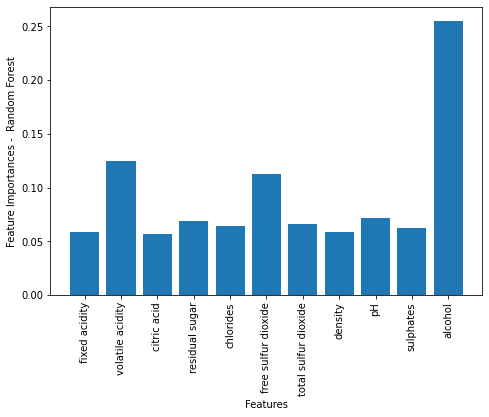

In [70]:
# Create the same plot as before
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(labels,rf_feat_imp)
plt.xlabel('Features')
plt.ylabel('Feature Importances -  Random Forest')
plt.show()

# Congrats!

You worked through another session that expands your knowledge from last week. You now know how to evaluate a model regarding which feature are important for it's predictions.

# Exercise

Now we are going to look at the California housing dataset again. We already know how to predict the prices but don't know yet what the important variables are for doing so. 

Feature importance analyses is also very important in psychological research since feature importance analysis enables you to unravel the underlying mechanisms behind a phenomenon a bit and enables you to design better experiemnts helping you to focus on the important aspects. 

Task:
Import the California housing set and use only the first 1000 rows. Step through the usual steps of data preparation and model training and testing. You do not need to worry about cross-validation (use a train-test split as we did in this exercises) and hyperparameter tuning this time. Instead take the time and explore feature importances using Linear Regression, Decision Trees and Random Forests. 

In [71]:
# Import data
from sklearn import datasets
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)



In [72]:
california_df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

california_df['PRICE'] = pd.Series(california_housing.target) 

california_df = california_df.iloc[0:1000] 

california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [73]:
X = california_df.drop(columns='PRICE')
y = california_df.PRICE
#print(y)
y = y.values.reshape(-1, 1)
#print(y)

In [74]:
# 1. Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
# Instantiate Regressor 
lin_regr = LinearRegression()
# 2. Fitting the Regression
lin_regr.fit(X_train, y_train)
# 3. Test regressor with test data (and training data to compare them)
y_pred_test = lin_regr.predict(X_test)
y_pred_train = lin_regr.predict(X_train)
# 4. Calc metric (e.g. r2)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
# We now have our predictions and the overall performance of our model
print('Predictions: ', y_pred_test)

print('Train performance: ', r2_train)

print('Test performance: ', r2_test)

Predictions:  [[2.80535265]
 [2.24076081]
 [1.45174053]
 [1.84693957]
 [2.23321226]
 [3.25417659]
 [1.45140702]
 [2.17715515]
 [1.25062831]
 [3.03406911]
 [2.18177048]
 [2.25202968]
 [2.42235637]
 [1.70809144]
 [2.36843359]
 [1.22336329]
 [2.2956794 ]
 [1.42233112]
 [1.67184206]
 [0.92729714]
 [1.51126456]
 [1.85254011]
 [1.53222796]
 [1.2893566 ]
 [2.50660593]
 [1.9322607 ]
 [1.85903257]
 [1.8634332 ]
 [1.68428792]
 [4.11736251]
 [1.65883113]
 [1.04254926]
 [1.53403511]
 [1.83030207]
 [3.54427717]
 [2.04014471]
 [3.16906012]
 [2.67443219]
 [2.28485205]
 [1.9904114 ]
 [2.17692085]
 [4.0510461 ]
 [1.83761061]
 [1.89662248]
 [1.15705146]
 [1.86012276]
 [1.72682491]
 [3.4579232 ]
 [0.9736721 ]
 [2.48447281]
 [1.3906597 ]
 [1.31823898]
 [1.59518206]
 [2.08530069]
 [2.78928613]
 [2.99060666]
 [2.02034752]
 [0.42306035]
 [2.32038973]
 [1.13148793]
 [2.35137932]
 [2.07993819]
 [3.30849717]
 [1.28391711]
 [2.89327233]
 [1.07365952]
 [1.48154473]
 [1.77441945]
 [2.0773728 ]
 [3.77954747]
 [2.33

In [75]:
coef = lin_regr.coef_ # Q: Warum macht man das?
print(coef)
print(type(coef))

coef = coef.tolist()[0]
print(coef)
print(type(coef))


[[ 3.63907017e-01  4.67286537e-04  1.16220342e-02 -3.42048012e-01
   8.36813420e-05 -1.86754122e-01  1.61272671e+00  3.50192535e-01]]
<class 'numpy.ndarray'>
[0.36390701663582053, 0.000467286536534253, 0.011622034203826643, -0.34204801222751097, 8.368134200407822e-05, -0.18675412159639856, 1.6127267118875428, 0.35019253472937395]
<class 'list'>


In [76]:
labels = california_df.columns.values[:-1].tolist()
print(labels)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [77]:
# Import standardizer package
from sklearn.preprocessing import StandardScaler
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
#############################################################################
# Here is the StandardScaler application
# Standardize data using StandardScaler - 
# Create and fit StandardScaler
scaler_features = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_train)
scaler_targets = StandardScaler(copy=True, with_mean=True, with_std=True).fit(y_train)
# sidenote: it is important that we use the same scaling on both, training and test data.
# use the scaler derived form the training set (as in reality you would have no access to test data yet)
# Transform the data
X_train = scaler_features.transform(X_train)
y_train = scaler_targets.transform(y_train)
X_test = scaler_features.transform(X_test)
y_test = scaler_targets.transform(y_test)
#############################################################################
# From here on we perform the usual steps 
# Instantiate Regressor 
lin_regr = LinearRegression()
# Fitting the Regression
lin_regr.fit(X_train, y_train)
# Test regressor with test data (and training data to compare them)
y_pred_test = lin_regr.predict(X_test)
y_pred_train = lin_regr.predict(X_train)
# Calc metric (e.g. r2)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
# Get coefficients 
coef = lin_regr.coef_.tolist()[0]



In [78]:
print(r2_train)
print(r2_test)

0.6411546240511947
0.6214976183850169


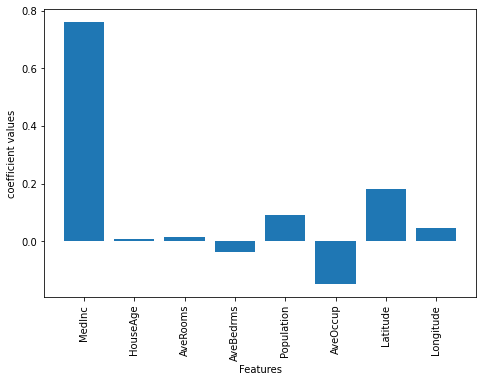

In [79]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(labels, coef)
plt.xlabel('Features')
plt.ylabel('coefficient values')
plt.show()

# However, we left it in so you can switch between standardized/non-standardized.
# Go ahead and try it both ways and observe what happens!
# Preparing data assigning features and target - prepared for reloading data / exploring standardization
X = df_wine.drop(columns='quality')
y = df_wine.quality.values.reshape(-1, 1)
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
# Create and fit StandardScaler
scaler_features = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_train)
# Transform the data
X_train = scaler_features.transform(X_train)
X_test = scaler_features.transform(X_test)
# Instantiate Regressor, using max_depth=6, since we already found out in exercise 6 that it is the best setting
dec_tree = DecisionTreeRegressor(max_depth=6)
# Fitting the Decision tree
dec_tree.fit(X_train, y_train)
# Test DT with test data (and training data to compare them)
y_pred_test = dec_tree.predict(X_test)
y_pred_train = dec_tree.predict(X_train)
# Calc metric (e.g. r2)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print(r2_train)
print(r2_test)

'''
The importance of features is automatically computed during the training of the DT and 
stored in the feature_importance_ variable
'''
print(dec_tree.feature_importances_)

# Convert the features importance to list
feat_imp = dec_tree.feature_importances_.tolist()
print(feat_imp)

# Create the same plot as for the feature importance in the linear model
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.xticks(rotation=90)
ax.bar(labels,feat_imp)
plt.xlabel('Features')
plt.ylabel('Feature Importances - Decision Tree')
plt.show()

0.8739810857181034
0.5609593258865896
[0.71088087 0.01116276 0.02855835 0.01639584 0.01139797 0.13271392
 0.05927975 0.02961054]
[0.7108808710708466, 0.011162762366011013, 0.028558352189051044, 0.016395835064982982, 0.011397971511382181, 0.1327139180248367, 0.059279745633444174, 0.02961054413944524]


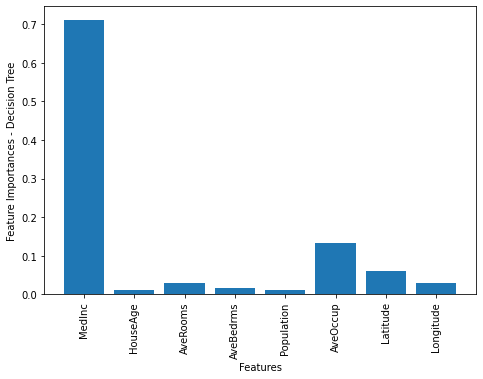

In [80]:
# Note: We would not have to redo the standarization since the data is still standardized.
# However, we left it in so you can switch between standardized/non-standardized.
# Go ahead and try it both ways and observe what happens!
# Preparing data assigning features and target - prepared for reloading data / exploring standardization
#X = df_wine.drop(columns='quality')
#y = df_wine.quality.values.reshape(-1, 1)
# Split data into training and test set
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
# Create and fit StandardScaler
#scaler_features = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_train)
# Transform the data
#X_train = scaler_features.transform(X_train)
#X_test = scaler_features.transform(X_test)
# Instantiate Regressor, using max_depth=6, since we already found out in exercise 6 that it is the best setting
#dec_tree = DecisionTreeRegressor(max_depth=6)
# Fitting the Decision tree
dec_tree.fit(X_train, y_train)
# Test DT with test data (and training data to compare them)
y_pred_test = dec_tree.predict(X_test)
y_pred_train = dec_tree.predict(X_train)
# Calc metric (e.g. r2)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print(r2_train)
print(r2_test)

'''
The importance of features is automatically computed during the training of the DT and 
stored in the feature_importance_ variable
'''
print(dec_tree.feature_importances_)

# Convert the features importance to list
feat_imp = dec_tree.feature_importances_.tolist()
print(feat_imp)

# Create the same plot as for the feature importance in the linear model
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.xticks(rotation=90)
ax.bar(labels,feat_imp)
plt.xlabel('Features')
plt.ylabel('Feature Importances - Decision Tree')
plt.show()

In [81]:
#preds_x_test = lin_regr.predict(X_test)
#print(preds_x_test)

# inverse transform the coefficients
coef_retransformed = scaler_features.inverse_transform(lin_regr.coef_)
# we are using the coef np.array instead of the coef list as the method expects that type
#print(coef_retransformed)
lin_regr.coef_ = coef_retransformed
preds_x_test = lin_regr.predict(X_test)
#print(preds_x_test)
